# Urg√™ncias e morbilidade hospitalar
Projeto para a unidade curricular Programa√ß√£o para a Ci√™ncia de Dados
Feito por: Andr√© Santos N¬∫123579 e Joana Carvalho N¬∫123577

## Importar as bibliotecas necess√°rias

In [1]:
import pandas as pd # manipula√ß√£o de dados
import numpy as np # numeros e arrays
import matplotlib.pyplot as plt # visualiza√ß√£o de dados

from sklearn.model_selection import train_test_split # divis√£o de dados em treino e teste
from sklearn.linear_model import LinearRegression # regress√£o linear
from sklearn.ensemble import RandomForestRegressor # regress√£o com floresta aleat√≥ria
from sklearn.ensemble import RandomForestClassifier # classifica√ß√£o com floresta aleat√≥ria
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix # m√©tricas de avalia√ß√£o

import seaborn as sns # visualiza√ß√£o de dados
 
# mostrar gr√°ficos no notebook
%matplotlib inline

## Exportar os datesets necess√°rios para o projeto
Os nossos datasets foram descarregados atrav√©s do Portal da Transpar√™ncia do Servi√ßo Nacional de Sa√∫de (https://transparencia.sns.gov.pt/pages/home-page/) e est√£o localizados na pasta "datasets".
Come√ßamos por ler os ficheiros csv e transform√°-los em dataframes atrav√©s da biblioteca Pandas para podermos manipular dados.

In [2]:
# exportar os dados de urg√™ncias e morbilidade atrav√©s dos seus ficheiros CSV
urgencias = pd.read_csv('datasets/atendimentos-por-urgencia.csv', sep=';', encoding="utf-8")
morbilidade = pd.read_csv('datasets/morbilidade.csv', sep=';', encoding="utf-8")

print("Dados de Urg√™ncias:")
urgencias.info()

print("\nDados de Morbilidade:")
morbilidade.info()

print("Estatisticas Descritivas de Urg√™ncias:")
display(urgencias.describe())

print("\nEstatisticas Descritivas de Morbilidade:")
display(morbilidade.describe())

Dados de Urg√™ncias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Per√≠odo                 5841 non-null   object 
 1   Per√≠odo.Format.2        5841 non-null   object 
 2   Regi√£o                  5841 non-null   object 
 3   Institui√ß√£o             5841 non-null   object 
 4   Localiza√ß√£o Geogr√°fica  5841 non-null   object 
 5   Urg√™ncias Geral         5840 non-null   float64
 6   Urg√™ncias Pedi√°tricas   5111 non-null   float64
 7   Urg√™ncia Obstetricia    4964 non-null   float64
 8   Urg√™ncia Psiqui√°trica   440 non-null    float64
 9   Total Urg√™ncias         5840 non-null   float64
dtypes: float64(5), object(5)
memory usage: 456.5+ KB

Dados de Morbilidade:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480554 entries, 0 to 480553
Data columns (total 11 columns):
 #   Column                      

Urg√™ncias Geral  Urg√™ncias Pedi√°tricas  Urg√™ncia Obstetricia  \
count      5840.000000            5111.000000           4964.000000   
mean      58453.263014           19025.387008           5784.785254   
std       41716.860962           14936.701478           4899.294143   
min           0.000000               0.000000             53.000000   
25%       25716.500000            7561.000000           1898.750000   
50%       49684.000000           15106.000000           4360.000000   
75%       81574.250000           26936.000000           8417.500000   
max      292003.000000           84352.000000          30278.000000   

       Urg√™ncia Psiqui√°trica  Total Urg√™ncias  
count             440.000000      5840.000000  
mean             1196.631818     80110.959075  
std              1997.568234     58703.816226  
min                 0.000000         0.000000  
25%                 0.000000     34724.750000  
50%                 0.000000     66589.000000  
75%              1703.250000    112798.750000  
max              7450.000000    380759.000000


Estatisticas Descritivas de Morbilidade:


C√≥digo Cap√≠tulo Diagn√≥stico Principal  Internamentos  \
count                          480554.000000  480554.000000   
mean                               10.835119       9.737903   
std                                 6.098661      22.032583   
min                                 1.000000       0.000000   
25%                                 6.000000       1.000000   
50%                                11.000000       2.000000   
75%                                15.000000       8.000000   
max                                22.000000     470.000000   

       Dias de Internamento    Ambulat√≥rio         √ìbitos  
count         480554.000000  480554.000000  480554.000000  
mean              81.204044      10.074849       0.662144  
std              192.505873      42.037729       2.400307  
min                0.000000       0.000000       0.000000  
25%                3.000000       0.000000       0.000000  
50%               14.000000       1.000000       0.000000  
75%               67.000000       4.000000       0.000000  
max            11078.000000    1262.000000     120.000000

In [3]:
# mostrar as primeiras linhas dos dados de urg√™ncias
display(urgencias.head())

Per√≠odo Per√≠odo.Format.2                 Regi√£o  \
0  2024-01       2024/01/01    Regi√£o de Sa√∫de LVT   
1  2024-01       2024/01/01  Regi√£o de Sa√∫de Norte   
2  2024-01       2024/01/01    Regi√£o de Sa√∫de LVT   
3  2024-01       2024/01/01  Regi√£o de Sa√∫de Norte   
4  2024-01       2024/01/01  Regi√£o de Sa√∫de Norte   

                                         Institui√ß√£o  Localiza√ß√£o Geogr√°fica  \
0            Unidade Local de Sa√∫de da Arr√°bida, EPE    38.529351, -8.881073   
1  Unidade Local de Sa√∫de da P√≥voa de Varzim/Vila...    41.383183, -8.758784   
2      Unidade Local de Sa√∫de de Amadora/Sintra, EPE  38.7436332060551, -9.0   
3               Unidade Local de Sa√∫de de Braga, EPE   41.562328338623, -8.3   
4  Unidade Local de Sa√∫de de Entre Douro e Vouga,...       40.9295, -8.54567   

   Urg√™ncias Geral  Urg√™ncias Pedi√°tricas  Urg√™ncia Obstetricia  \
0           5433.0                 2425.0                 515.0   
1           5536.0                    NaN                   NaN   
2          13917.0                 3268.0                1303.0   
3          11752.0                 4087.0                 998.0   
4          15899.0                 2720.0                 630.0   

   Urg√™ncia Psiqui√°trica  Total Urg√™ncias  
0                    NaN           8373.0  
1                    NaN           5536.0  
2                    NaN          18488.0  
3                    NaN          16837.0  
4                    NaN          19249.0

In [4]:
# mostrar as primeiras linhas dos dados de urg√™ncias
display(morbilidade.head())

Per√≠odo  C√≥digo Cap√≠tulo Diagn√≥stico Principal  \
0  2019-07                                      1   
1  2019-07                                      1   
2  2019-07                                      1   
3  2019-07                                      1   
4  2019-07                                      2   

                                        Institui√ß√£o                   Regi√µes  \
0           Unidade Local de Sa√∫de do Oeste, E.P.E.       Regi√£o de Sa√∫de LVT   
1  Unidade Local de Sa√∫de do T√¢mega e Sousa, E.P.E.  Regi√£o de Sa√∫de do Norte   
2  Unidade Local de Sa√∫de do T√¢mega e Sousa, E.P.E.  Regi√£o de Sa√∫de do Norte   
3  Unidade Local de Sa√∫de do T√¢mega e Sousa, E.P.E.  Regi√£o de Sa√∫de do Norte   
4           Hospital de Cascais Dr. Jos√© de Almeida       Regi√£o de Sa√∫de LVT   

     Descri√ß√£o Cap√≠tulo Diagn√≥stico Principal Faixa Et√°ria Sexo  \
0  Algumas doen√ßas infecciosas e parasit√°rias       [5-15[    F   
1  Algumas doen√ßas infecciosas e parasit√°rias        [1-5[    M   
2  Algumas doen√ßas infecciosas e parasit√°rias      [45-65[    F   
3  Algumas doen√ßas infecciosas e parasit√°rias       [5-15[    F   
4                                  Neoplasias      [45-65[    F   

   Internamentos  Dias de Internamento  Ambulat√≥rio  √ìbitos  
0              1                     1            0       0  
1              3                    14            0       0  
2              2                    12            0       1  
3              2                     7            0       0  
4              8                   264            2       1

## Limpeza dos Dados
### Remover colunas desnecess√°rias
Come√ßamos a etapa de modela√ß√£o dos dados com a remo√ß√£o de colunas que ser√£o desnecess√°rias para o nosso projeto, a coluna "Per√≠odo.Format.2" na dataframe das urg√™ncias apenas mostra a data num formato diferente que n√£o √© necess√°rio para o que queremos no nosso modelo, por isso vamos remov√™-la.

In [5]:
urgencias = urgencias.drop(columns=['Per√≠odo.Format.2']) # remover a coluna 'Per√≠odo.Format.2' que n√£o √© necess√°ria para an√°lise
urgencias = urgencias.drop(columns=['Localiza√ß√£o Geogr√°fica']) # remover a coluna 'Localiza√ß√£o Geogr√°fica' que n√£o √© necess√°ria para an√°lise

# mostrar as primeiras linhas dos dados de urg√™ncias ap√≥s a remo√ß√£o das colunas
display(urgencias.head())

Per√≠odo                 Regi√£o  \
0  2024-01    Regi√£o de Sa√∫de LVT   
1  2024-01  Regi√£o de Sa√∫de Norte   
2  2024-01    Regi√£o de Sa√∫de LVT   
3  2024-01  Regi√£o de Sa√∫de Norte   
4  2024-01  Regi√£o de Sa√∫de Norte   

                                         Institui√ß√£o  Urg√™ncias Geral  \
0            Unidade Local de Sa√∫de da Arr√°bida, EPE           5433.0   
1  Unidade Local de Sa√∫de da P√≥voa de Varzim/Vila...           5536.0   
2      Unidade Local de Sa√∫de de Amadora/Sintra, EPE          13917.0   
3               Unidade Local de Sa√∫de de Braga, EPE          11752.0   
4  Unidade Local de Sa√∫de de Entre Douro e Vouga,...          15899.0   

   Urg√™ncias Pedi√°tricas  Urg√™ncia Obstetricia  Urg√™ncia Psiqui√°trica  \
0                 2425.0                 515.0                    NaN   
1                    NaN                   NaN                    NaN   
2                 3268.0                1303.0                    NaN   
3                 4087.0                 998.0                    NaN   
4                 2720.0                 630.0                    NaN   

   Total Urg√™ncias  
0           8373.0  
1           5536.0  
2          18488.0  
3          16837.0  
4          19249.0

### Renomear colunas
De seguida, mudamos o nome das colunas para estarem todas sem acentos e em letra pequena.

In [6]:
# renomear as colunas para facilitar a an√°lise
morbilidade = morbilidade.rename(columns={
    'Per√≠odo': 'periodo',
    'Regi√µes': 'regiao',
    'C√≥digo Cap√≠tulo Diagn√≥stico Principal': 'codigo_diagnostico',
    'Descri√ß√£o Cap√≠tulo Diagn√≥stico Principal': 'diagnostico',
    'Faixa Et√°ria': 'faixa_etaria',
    'Sexo': 'sexo',
    'Internamentos': 'internamentos',
    'Institui√ß√£o': 'instituicao',
    'Dias de Internamento': 'dias_internamento',
    'Ambulat√≥rio': 'ambulatorio',
    '√ìbitos': 'obitos',
})

urgencias = urgencias.rename(columns={
    'Per√≠odo': 'periodo',
    'Regi√£o': 'regiao',
    'Institui√ß√£o': 'instituicao',
    'Urg√™ncias Geral': 'urgencias_gerais',
    'Urg√™ncias Pedi√°tricas': 'urgencias_pediatricas',
    'Urg√™ncia Obstetricia': 'urgencias_obstetricas',
    'Urg√™ncia Psiqui√°trica': 'urgencias_psiquiatricas',
    'Total Urg√™ncias': 'total_urgencias'
})

### Preencher valores em falta
Como foi possivel ver nos passos anteriores, existem valores em falta para as colunas das "Urg√™ncias Geral", "Urg√™ncias Pedi√°tricas", "Urg√™ncia Obstetricia", "Urg√™ncia Psiqui√°trica" e "Total Urg√™ncias", por isso vamos preencher todos estes valores em falta com 0 para depois podermos converter estas colunas do tipo float para o tipo integer (algo que n√£o seria possivel fazer com valores em falta em algumas linhas)

In [7]:
# preencher valores ausentes com 0
urgencias.fillna(0, inplace=True)

### Trocar tipos de dados
Precisamos agora de trocar alguns tipos de dados em algumas colunas, ambas as colunas de "Per√≠odo" precisam ser alteradas para um formato datetime, e as colunas "Urg√™ncias Geral", "Urg√™ncias Pedi√°tricas", "Urg√™ncia Obstetricia", "Urg√™ncia Psiqui√°trica" e "Total Urg√™ncias" precisam ser alteradas para integer.

In [8]:
# converter colunas de per√≠odo para datetime
urgencias['periodo'] = pd.to_datetime(urgencias['periodo'])
morbilidade['periodo'] = pd.to_datetime(morbilidade['periodo'])

# converter colunas de n√∫meros para inteiros
urgencias['urgencias_gerais'] = urgencias['urgencias_gerais'].astype(int)
urgencias['urgencias_pediatricas'] = urgencias['urgencias_pediatricas'].astype(int)
urgencias['urgencias_obstetricas'] = urgencias['urgencias_obstetricas'].astype(int)
urgencias['urgencias_psiquiatricas'] = urgencias['urgencias_psiquiatricas'].astype(int)
urgencias['total_urgencias'] = urgencias['total_urgencias'].astype(int)

print("Tipos de dados em urg√™ncias:")
print(urgencias.dtypes)
print("\nTipos de dados em morbilidade:")
print(morbilidade.dtypes)

Tipos de dados em urg√™ncias:
periodo                    datetime64[ns]
regiao                             object
instituicao                        object
urgencias_gerais                    int64
urgencias_pediatricas               int64
urgencias_obstetricas               int64
urgencias_psiquiatricas             int64
total_urgencias                     int64
dtype: object

Tipos de dados em morbilidade:
periodo               datetime64[ns]
codigo_diagnostico             int64
instituicao                   object
regiao                        object
diagnostico                   object
faixa_etaria                  object
sexo                          object
internamentos                  int64
dias_internamento              int64
ambulatorio                    int64
obitos                         int64
dtype: object


### Remover letras e caracteres desnecess√°rias
Podemos reparar que a coluna da faixa et√°ria tem parentesis retos desnecess√°rios, ent√£o come√ßamos por os remover. De seguida, iremos tamb√©m remover a indica√ß√£o do modelo de gest√£o de cada hospital pois n√£o faz sentido para o nosso estudo e ir√° permitir uma melhor padroniza√ß√£o dos dados mais tarde.

In [9]:
# remover parentesis retos da coluna faixa_etaria
morbilidade['faixa_etaria'] = morbilidade['faixa_etaria'].str.replace('[', '')
morbilidade['faixa_etaria'] = morbilidade['faixa_etaria'].str.replace(']', '')

# remover indica√ß√£o do modelo de gest√£o da institui√ß√£o
morbilidade['instituicao'] = morbilidade['instituicao'].str.split(',').str[0]
urgencias['instituicao'] = urgencias['instituicao'].str.split(',').str[0]

# remover a palavra "do" da coluna regiao
morbilidade['regiao'] = morbilidade['regiao'].str.replace(' do ', ' ', regex=False)
urgencias['regiao'] = urgencias['regiao'].str.replace(' do ', ' ', regex=False)

# mostrar as primeiras linhas dos dados de urg√™ncias e morbilidade ap√≥s as altera√ß√µes
print("\nDados de Urg√™ncias ap√≥s altera√ß√µes:")
display(urgencias.head())
print("\nDados de Morbilidade ap√≥s altera√ß√µes:")
display(morbilidade.head())


Dados de Urg√™ncias ap√≥s altera√ß√µes:


periodo                 regiao  \
0 2024-01-01    Regi√£o de Sa√∫de LVT   
1 2024-01-01  Regi√£o de Sa√∫de Norte   
2 2024-01-01    Regi√£o de Sa√∫de LVT   
3 2024-01-01  Regi√£o de Sa√∫de Norte   
4 2024-01-01  Regi√£o de Sa√∫de Norte   

                                         instituicao  urgencias_gerais  \
0                 Unidade Local de Sa√∫de da Arr√°bida              5433   
1  Unidade Local de Sa√∫de da P√≥voa de Varzim/Vila...              5536   
2           Unidade Local de Sa√∫de de Amadora/Sintra             13917   
3                    Unidade Local de Sa√∫de de Braga             11752   
4      Unidade Local de Sa√∫de de Entre Douro e Vouga             15899   

   urgencias_pediatricas  urgencias_obstetricas  urgencias_psiquiatricas  \
0                   2425                    515                        0   
1                      0                      0                        0   
2                   3268                   1303                        0   
3                   4087                    998                        0   
4                   2720                    630                        0   

   total_urgencias  
0             8373  
1             5536  
2            18488  
3            16837  
4            19249


Dados de Morbilidade ap√≥s altera√ß√µes:


periodo  codigo_diagnostico                               instituicao  \
0 2019-07-01                   1           Unidade Local de Sa√∫de do Oeste   
1 2019-07-01                   1  Unidade Local de Sa√∫de do T√¢mega e Sousa   
2 2019-07-01                   1  Unidade Local de Sa√∫de do T√¢mega e Sousa   
3 2019-07-01                   1  Unidade Local de Sa√∫de do T√¢mega e Sousa   
4 2019-07-01                   2   Hospital de Cascais Dr. Jos√© de Almeida   

                  regiao                                 diagnostico  \
0    Regi√£o de Sa√∫de LVT  Algumas doen√ßas infecciosas e parasit√°rias   
1  Regi√£o de Sa√∫de Norte  Algumas doen√ßas infecciosas e parasit√°rias   
2  Regi√£o de Sa√∫de Norte  Algumas doen√ßas infecciosas e parasit√°rias   
3  Regi√£o de Sa√∫de Norte  Algumas doen√ßas infecciosas e parasit√°rias   
4    Regi√£o de Sa√∫de LVT                                  Neoplasias   

  faixa_etaria sexo  internamentos  dias_internamento  ambulatorio  obitos  
0         5-15    F              1                  1            0       0  
1          1-5    M              3                 14            0       0  
2        45-65    F              2                 12            0       1  
3         5-15    F              2                  7            0       0  
4        45-65    F              8                264            2       1

### Remover todos os dados antes de 2019
O dataset da morbilidade apenas tem dados para os anos a partir de 2019 ent√£o vamos apagar todos os dados at√© 2019 do dataset das urgencias

In [21]:
urgencias = urgencias[urgencias['periodo'] >= '2019-01-01']

urgencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2960 entries, 0 to 5840
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   periodo                  2960 non-null   datetime64[ns]
 1   regiao                   2960 non-null   object        
 2   instituicao              2960 non-null   object        
 3   urgencias_gerais         2960 non-null   int64         
 4   urgencias_pediatricas    2960 non-null   int64         
 5   urgencias_obstetricas    2960 non-null   int64         
 6   urgencias_psiquiatricas  2960 non-null   int64         
 7   total_urgencias          2960 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 208.1+ KB


### Remover institui√ß√µes e trabalhar apenas com a regi√£o
Como os nomes das institui√ß√µes variam muito entre os dois datasets, decidimos descartar as institui√ß√µes e fazer apenas o estudo baseado na regi√£o em que cada institui√ß√£o se localiza.

In [33]:
# Confirmar as regi√µes √∫nicas nas urg√™ncias e na morbilidade
print("regioes √∫nicas em urg√™ncias:")
print(urgencias['regiao'].unique())
print("\nregioes √∫nicas em morbilidade:")
print(morbilidade['regiao'].unique())

morbilidade_ano_regiao = morbilidade.groupby(["periodo", "regiao"]).agg({"obitos": "sum", "internamentos": "sum", "dias_internamento": "sum", "ambulatorio": "sum"})
urgencias_ano_regiao = urgencias.groupby(["periodo", "regiao"]).agg({"total_urgencias": "sum", "urgencias_gerais": "sum", "urgencias_pediatricas": "sum", "urgencias_obstetricas": "sum", "urgencias_psiquiatricas": "sum"})

df_modelo = pd.merge(urgencias_ano_regiao, morbilidade_ano_regiao, on=["periodo", "regiao"])

display(df_modelo.head(15))

regioes √∫nicas em urg√™ncias:
['Regi√£o de Sa√∫de LVT' 'Regi√£o de Sa√∫de Norte' 'Regi√£o de Sa√∫de Centro'
 'Regi√£o de Sa√∫de Alentejo' 'Regi√£o de Sa√∫de Algarve']

regioes √∫nicas em morbilidade:
['Regi√£o de Sa√∫de LVT' 'Regi√£o de Sa√∫de Norte' 'Regi√£o de Sa√∫de Centro'
 'Regi√£o de Sa√∫de Algarve' 'Regi√£o de Sa√∫de Alentejo']


total_urgencias  urgencias_gerais  \
periodo    regiao                                                        
2019-01-01 Regi√£o de Sa√∫de Alentejo            34008             28888   
           Regi√£o de Sa√∫de Algarve             30132             21191   
           Regi√£o de Sa√∫de Centro             102208             71458   
           Regi√£o de Sa√∫de LVT                210891            135017   
           Regi√£o de Sa√∫de Norte              188744            142473   
2019-02-01 Regi√£o de Sa√∫de Alentejo            64996             55226   
           Regi√£o de Sa√∫de Algarve             57994             41004   
           Regi√£o de Sa√∫de Centro             190745            135277   
           Regi√£o de Sa√∫de LVT                397192            254047   
           Regi√£o de Sa√∫de Norte              369901            278447   
2019-03-01 Regi√£o de Sa√∫de Alentejo            94816             80925   
           Regi√£o de Sa√∫de Algarve             87183             62053   
           Regi√£o de Sa√∫de Centro             283059            202761   
           Regi√£o de Sa√∫de LVT                593726            383895   
           Regi√£o de Sa√∫de Norte              551005            418406   

                                     urgencias_pediatricas  \
periodo    regiao                                            
2019-01-01 Regi√£o de Sa√∫de Alentejo                   4697   
           Regi√£o de Sa√∫de Algarve                    7204   
           Regi√£o de Sa√∫de Centro                    24723   
           Regi√£o de Sa√∫de LVT                       60207   
           Regi√£o de Sa√∫de Norte                     35392   
2019-02-01 Regi√£o de Sa√∫de Alentejo                   8998   
           Regi√£o de Sa√∫de Algarve                   13735   
           Regi√£o de Sa√∫de Centro                    44275   
           Regi√£o de Sa√∫de LVT                      113369   
           Regi√£o de Sa√∫de Norte                     71148   
2019-03-01 Regi√£o de Sa√∫de Alentejo                  12784   
           Regi√£o de Sa√∫de Algarve                   20138   
           Regi√£o de Sa√∫de Centro                    63587   
           Regi√£o de Sa√∫de LVT                      164039   
           Regi√£o de Sa√∫de Norte                    101861   

                                     urgencias_obstetricas  \
periodo    regiao                                            
2019-01-01 Regi√£o de Sa√∫de Alentejo                    423   
           Regi√£o de Sa√∫de Algarve                    1737   
           Regi√£o de Sa√∫de Centro                     6027   
           Regi√£o de Sa√∫de LVT                       15177   
           Regi√£o de Sa√∫de Norte                     10879   
2019-02-01 Regi√£o de Sa√∫de Alentejo                    772   
           Regi√£o de Sa√∫de Algarve                    3255   
           Regi√£o de Sa√∫de Centro                    11193   
           Regi√£o de Sa√∫de LVT                       28790   
           Regi√£o de Sa√∫de Norte                     20306   
2019-03-01 Regi√£o de Sa√∫de Alentejo                   1107   
           Regi√£o de Sa√∫de Algarve                    4992   
           Regi√£o de Sa√∫de Centro                    16711   
           Regi√£o de Sa√∫de LVT                       44234   
           Regi√£o de Sa√∫de Norte                     30738   

                                     urgencias_psiquiatricas  obitos  \
periodo    regiao                                                      
2019-01-01 Regi√£o de Sa√∫de Alentejo                        0     288   
           Regi√£o de Sa√∫de Algarve                         0     289   
           Regi√£o de Sa√∫de Centro                          0    1109   
           Regi√£o de Sa√∫de LVT                           490    2213   
           Regi√£o de Sa√∫de Norte                           0    1774   
2019-02-01 Regi√£o de Sa√∫de Alentejo                        0  

### Entender os dados depois da limpeza
Depois de termos concluido a limpeza dos nossos dados, vamos tentar entende-los para come√ßarmos a fazer a prepara√ß√£o dos modelo de previs√£o.

In [ ]:
print("Total urg√™ncias por regi√£o:")
print(df_modelo.groupby('regiao')['total_urgencias'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias gerais por regi√£o:")
print(df_modelo.groupby('regiao')['urgencias_gerais'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias pedi√°tricas por regi√£o:")
print(df_modelo.groupby('regiao')['urgencias_pediatricas'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias obst√©tricas por regi√£o:")
print(df_modelo.groupby('regiao')['urgencias_obstetricas'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias psiqui√°tricas por regi√£o:")
print(df_modelo.groupby('regiao')['urgencias_psiquiatricas'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal internamentos por regi√£o:")
print(df_modelo.groupby('regiao')['internamentos'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal de √≥bitos por regi√£o:")
print(df_modelo.groupby('regiao')['obitos'].sum().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['total_urgencias'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias gerais por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_gerais'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias pedi√°tricas por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_pediatricas'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias obst√©tricas por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_obstetricas'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal urg√™ncias psiqui√°tricas por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['urgencias_psiquiatricas'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal internamentos por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['internamentos'].sum().apply(lambda x: f"{x:,.0f}"))

print("\nTotal √≥bitos por ano:")
print(df_modelo.groupby(df_modelo.index.get_level_values('periodo').year)['obitos'].sum().apply(lambda x: f"{x:,.0f}"))


Total urg√™ncias por regi√£o:
regiao
Regi√£o de Sa√∫de Norte       79,774,391
Regi√£o de Sa√∫de LVT         78,732,973
Regi√£o de Sa√∫de Centro      39,843,349
Regi√£o de Sa√∫de Algarve     13,182,348
Regi√£o de Sa√∫de Alentejo    13,058,678
Name: total_urgencias, dtype: object

Total urg√™ncias gerais por regi√£o:
regiao
Regi√£o de Sa√∫de Norte       62,621,529
Regi√£o de Sa√∫de LVT         52,549,612
Regi√£o de Sa√∫de Centro      29,216,628
Regi√£o de Sa√∫de Alentejo    11,276,951
Regi√£o de Sa√∫de Algarve      9,943,070
Name: urgencias_gerais, dtype: object

Total urg√™ncias pedi√°tricas por regi√£o:
regiao
Regi√£o de Sa√∫de LVT         19,799,776
Regi√£o de Sa√∫de Norte       12,633,885
Regi√£o de Sa√∫de Centro       8,122,600
Regi√£o de Sa√∫de Algarve      2,502,469
Regi√£o de Sa√∫de Alentejo     1,558,346
Name: urgencias_pediatricas, dtype: object

Total urg√™ncias obst√©tricas por regi√£o:
regiao
Regi√£o de Sa√∫de LVT         6,140,259
Regi√£o de Sa√∫de Norte       4,518,977
Reg

periodo
2019    51,458
2020    54,199
2021    57,092
2022    54,795
2023    51,232
2024    43,167
2025     4,607
Name: obitos, dtype: object

Podemos perceber que existe mais urg√™ncias, internamentos e √≥bitos na regi√£o de Lisboa e Vale do Tejo (LVT) e na regi√£o do Norte, o que faz sentido visto que s√£o as zonas com mais popula√ß√£o.

## Modela√ß√£o
### Prever o n√∫mero de √≥bitos baseado no n√∫mero de internamentos
#### Selecionar o modelo adequado
Come√ßamos por experimentar a utilizar uma regress√£o linear para prever o n√∫mero de √≥bitos baseado no n√∫mero de internamentos

Coeficiente (a): 0.06090784317569831
Intercepto (b): 89.78902839850105
Erro m√©dio absoluto (MAE): 112.12722260565494
Erro m√©dio quadr√°tico (MSE): 43168.43488795623
Raiz do erro m√©dio quadr√°tico (RMSE): 207.77014917440914
R¬≤: 0.8831730045390914


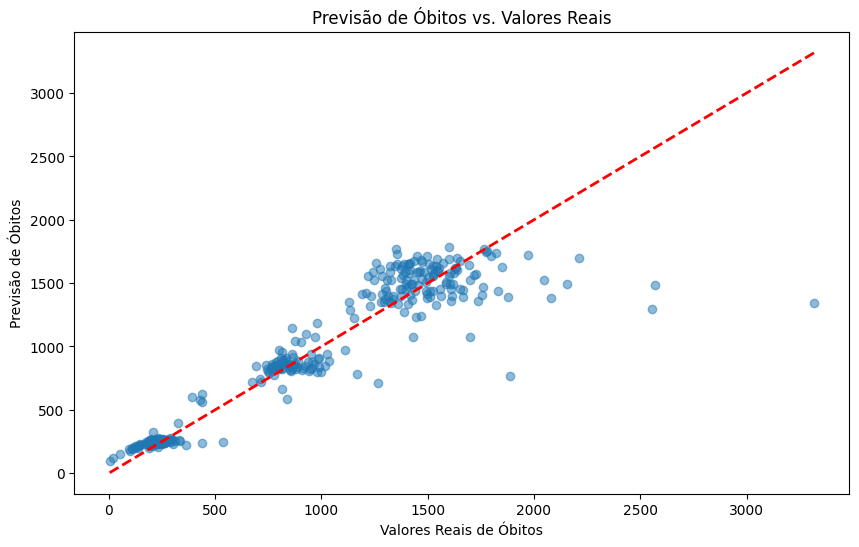

In [14]:
# definir features e target
X = df_modelo[["internamentos"]]
y = df_modelo["obitos"]

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo de regress√£o linear
lr_model = LinearRegression()
lr_model.fit(X, y)
print("Coeficiente (a):", lr_model.coef_[0])
print("Intercepto (b):", lr_model.intercept_)

# fazer previs√µes
y_pred = lr_model.predict(X)

# avaliar o modelo
print("Erro m√©dio absoluto (MAE):", mean_absolute_error(y, y_pred))
print("Erro m√©dio quadr√°tico (MSE):", mean_squared_error(y, y_pred))
print("Raiz do erro m√©dio quadr√°tico (RMSE):", np.sqrt(mean_squared_error(y, y_pred)))
print("R¬≤:", r2_score(y, y_pred))

# mostrar o modelo
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.title('Previs√£o de √ìbitos vs. Valores Reais')
plt.xlabel('Valores Reais de √ìbitos')
plt.ylabel('Previs√£o de √ìbitos')
plt.show()

Como podemos ver atrav√©s da avalia√ß√£o do modelo, o score R¬≤ est√° bastante alto (0.88), portanto vamos utilizar este modelo.

#### Previs√£o de √≥bitos para 2025
Vamos tentar atrav√©s do nosso modelo prever a quantidade de √≥bitos para o ano de 2025, para isso, vamos utilizar os valores do ano anterior (2024), e utilizar uma variavel "increase" para multiplicar o numero de internamentos nos dados ficticios de 2025

In [15]:
# recolher apenas os dados de 2024
df_2024 = df_modelo[df_modelo.index.get_level_values('periodo').year == 2024]
increase = 1.15  # +15%

data_2025 = (df_2024[["internamentos"]].sum() * increase).round()

print(f"\nTotal de internamentos para 2025 (aumento de 15%): {int(data_2025["internamentos"]):,}")
df_2025 = pd.DataFrame([data_2025.round()])

# Fazer a previs√£o para 2025
predict_2025 = lr_model.predict(df_2025)
print(f"\nPrevis√£o de √≥bitos para o ano de 2025: {int(predict_2025[0]):,}")


Total de internamentos para 2025 (aumento de 15%): 803,648

Previs√£o de √≥bitos para o ano de 2025: 49,038


### Que tipo de urg√™ncia tem maior impacto nos internamentos hospitalares?
Prever internamentos com base nos v√°rios tipos de urg√™ncias (pergunta de regress√£o)
#### Selecionar o modelo adequado

Erro m√©dio absoluto: 3078.8233783783785
Erro m√©dio quadr√°tico: 25348073.727985132
Raiz do erro m√©dio quadr√°tico: 5034.687053629563
R¬≤ do modelo: 0.7225377726165858


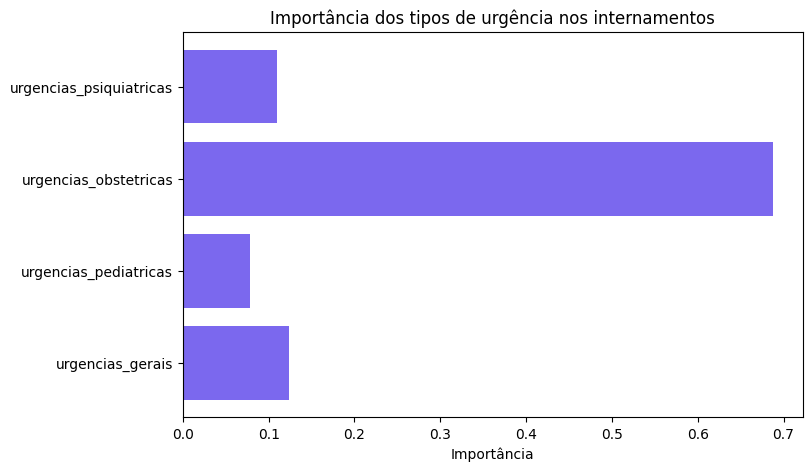

In [16]:
# definir features e target
X = df_modelo[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas"
]]
y = df_modelo["internamentos"]

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo de random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# fazer previs√µes
y_pred = rf_model.predict(X_test)

# avaliar o modelo
print("Erro m√©dio absoluto:", mean_absolute_error(y_test, y_pred))
print("Erro m√©dio quadr√°tico:", mean_squared_error(y_test, y_pred))
print("Raiz do erro m√©dio quadr√°tico:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R¬≤ do modelo:", r2_score(y_test, y_pred))

# import√¢ncia das vari√°veis
importancias = rf_model.feature_importances_
labels = X.columns

# plotar o gr√°fico de import√¢ncia
plt.figure(figsize=(8, 5))
plt.barh(labels, importancias, color="mediumslateblue")
plt.title("Import√¢ncia dos tipos de urg√™ncia nos internamentos")
plt.xlabel("Import√¢ncia")
plt.show()

Podemos ver que a variavel que teve mais impacto nas decis√µes das random forests foi as Urg√™ncias Obstetricas

In [17]:
df_2024 = df_modelo[df_modelo.index.get_level_values('periodo').year == 2024]
increase = 1.15  # +15%

data_2025 = (df_2024[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas"
]] * increase).round()

# Fazer a previs√£o
predict_2025 = rf_model.predict(data_2025)

print(f"\nPrevis√£o de internamentos para 2025: {int(predict_2025.sum()):,}")


Previs√£o de internamentos para 2025: 747,310


### Prever se uma determinada regi√£o tem press√£o hospitalar alta
Com base nos dados que temos, conseguimos prever se uma regi√£o estar√° sob alta press√£o hospitalar?
Definimos press√£o hospitalar atrav√©s da m√©dia de internamentos + dias de internamento.
#### Selecionar o modelo adequado

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.94      0.91      0.93        34

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



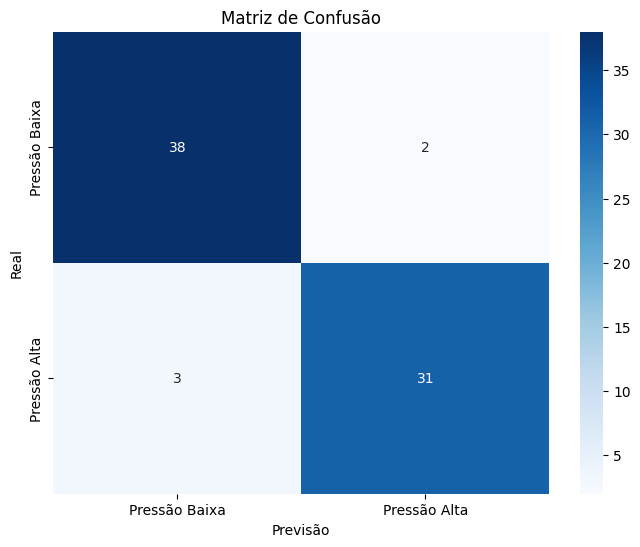

In [35]:
# criar coluna da soma
df_modelo["pressao_total"] = df_modelo["internamentos"] + df_modelo["dias_internamento"]

# calcular a m√©dia
avg = df_modelo["pressao_total"].mean()

# criar coluna bin√°ria
df_modelo["pressao_alta"] = (df_modelo["pressao_total"] > avg).astype(int)

# definir features e target para classifica√ß√£o
X = df_modelo[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas",
    "ambulatorio",
    "obitos"
]]
y = df_modelo["pressao_alta"]

# dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo de random forest para classifica√ß√£o
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train, y_train)

# fazer previs√µes
y_pred = rfc_model.predict(X_test)

# avaliar o modelo de classifica√ß√£o
print("Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred))

# mostrar a matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Press√£o Baixa', 'Press√£o Alta'], yticklabels=['Press√£o Baixa', 'Press√£o Alta'])
plt.title("Matriz de Confus√£o")
plt.xlabel("Previs√£o")
plt.ylabel("Real")
plt.show()

In [36]:
# 1. Obter dados de 2024
df_2024 = df_modelo[df_modelo.index.get_level_values("periodo").year == 2024].copy()

# 2. Aumentar os valores em 10%
df_2025_input = df_2024[[
    "urgencias_gerais",
    "urgencias_pediatricas",
    "urgencias_obstetricas",
    "urgencias_psiquiatricas",
    "ambulatorio",
    "obitos"
]] * 1.10  # simular aumento

# 3. Fazer a previs√£o
previsoes_2025 = rfc_model.predict(df_2025_input)

# 4. Juntar com nomes de regi√µes
df_resultado_2025 = df_2024.copy()
df_resultado_2025["pressao_prevista"] = previsoes_2025

# Reset index to access 'regiao' as a column
df_resumo = df_resultado_2025.reset_index()[["periodo", "regiao", "pressao_prevista"]]

df_resumo["pressao_prevista"] = df_resumo["pressao_prevista"].map({
    1: "üî¥ Press√£o hospitalar alta",
    0: "üü¢ Press√£o hospitalar normal"
})

print("Previs√£o de press√£o hospitalar por regi√£o para 2025:")

display(df_resumo)

Previs√£o de press√£o hospitalar por regi√£o para 2025:


periodo                    regiao             pressao_prevista
0  2024-01-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
1  2024-01-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
2  2024-01-01    Regi√£o de Sa√∫de Centro    üî¥ Press√£o hospitalar alta
3  2024-01-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
4  2024-01-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
5  2024-02-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
6  2024-02-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
7  2024-02-01    Regi√£o de Sa√∫de Centro    üî¥ Press√£o hospitalar alta
8  2024-02-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
9  2024-02-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
10 2024-03-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
11 2024-03-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
12 2024-03-01    Regi√£o de Sa√∫de Centro    üî¥ Press√£o hospitalar alta
13 2024-03-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
14 2024-03-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
15 2024-04-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
16 2024-04-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
17 2024-04-01    Regi√£o de Sa√∫de Centro    üî¥ Press√£o hospitalar alta
18 2024-04-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
19 2024-04-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
20 2024-05-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
21 2024-05-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
22 2024-05-01    Regi√£o de Sa√∫de Centro    üî¥ Press√£o hospitalar alta
23 2024-05-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
24 2024-05-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
25 2024-06-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
26 2024-06-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
27 2024-06-01    Regi√£o de Sa√∫de Centro  üü¢ Press√£o hospitalar normal
28 2024-06-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
29 2024-06-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
30 2024-07-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
31 2024-07-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
32 2024-07-01    Regi√£o de Sa√∫de Centro    üî¥ Press√£o hospitalar alta
33 2024-07-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
34 2024-07-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
35 2024-08-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
36 2024-08-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
37 2024-08-01    Regi√£o de Sa√∫de Centro  üü¢ Press√£o hospitalar normal
38 2024-08-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
39 2024-08-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
40 2024-09-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
41 2024-09-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
42 2024-09-01    Regi√£o de Sa√∫de Centro  üü¢ Press√£o hospitalar normal
43 2024-09-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
44 2024-09-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
45 2024-10-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
46 2024-10-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
47 2024-10-01    Regi√£o de Sa√∫de Centro  üü¢ Press√£o hospitalar normal
48 2024-10-01       Regi√£o de Sa√∫de LVT    üî¥ Press√£o hospitalar alta
49 2024-10-01     Regi√£o de Sa√∫de Norte    üî¥ Press√£o hospitalar alta
50 2024-11-01  Regi√£o de Sa√∫de Alentejo  üü¢ Press√£o hospitalar normal
51 2024-11-01   Regi√£o de Sa√∫de Algarve  üü¢ Press√£o hospitalar normal
52 2024-11-01    Regi√£o de Sa√∫de Ce